In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=765be50447ece820779459395af5da9830bbc95c8ef80b5e0b2c3831c054930c
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [3]:
import import_ipynb

In [4]:
%cd /content/drive/MyDrive/A62_projet_synthese_feature/notebook

/content/drive/MyDrive/A62_projet_synthese_feature/notebook


In [5]:
%run iteration_01_0_imports.py

In [6]:
%run iteration_01_0_parameters.py

In [7]:
import iteration_01_0_utils as utils

importing Jupyter notebook from iteration_01_0_utils.ipynb


In [8]:
%whos

Variable           Type      Data/Info
--------------------------------------
HEALTHY            str       H
IMG_SIZE           int       400
Image              module    <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
NBR_SAMPLE         int       20
PATH_DATA          str       ../data
PATH_DATA_EDA      str       ../data/eda
PATH_DATA_LIST     str       ../data/list
PATH_DATA_SAMPLE   str       ../data/sample
PATH_MODEL         str       ../model
PATH_ROOT          str       ..
PATH_SOURCE_IMG    str       /content/drive/MyDrive/A6<...>_synthese_lnk/cell_images
SICK               str       S
cv2                module    <module 'cv2.cv2' from '/<...>37m-x86_64-linux-gnu.so'>
datetime           type      <class 'datetime.datetime'>
drive              module    <module 'google.colab.dri<...>s/google/colab/drive.py'>
glob               module    <module 'glob' from '/usr/lib/python3.7/glob.py'>
import_ipynb       module    <module 'import_ipynb' fr<...>ackages/import_ipynb.py'>


In [9]:
DATE_TIME = "2021-11-18_20-39-00"

# Production

## make X

In [10]:
PATH_DATA_SAMPLE

'../data/sample'

In [11]:
DATE_TIME

'2021-11-18_20-39-00'

In [12]:
IMG_SIZE

400

In [13]:
IMG_IN_COLOR = 1
def positive_global_std(path_img: str) -> np.array:
    img_arr = cv2.imread(path_img, flags = IMG_IN_COLOR)
    mean = img_arr.mean()
    std  = img_arr.std()
    img_arr_std = (img_arr - mean) / std
    
    # clip les valeurs
    img_arr_std = np.clip(img_arr_std, -1.0, 1.0)
    
    # shift to 0--1
    img_arr_std = (img_arr_std + 1.0) / 2.0
    
    return img_arr_std

In [15]:
path_img = "/content/drive/MyDrive/A62_projet_synthese_develop_main/A62_projet_synthese_lnk/cell_images/Parasitized/C33P1thinF_IMG_20150619_121503a_cell_158.png"
img_arr = positive_global_std(path_img)
# padding
img_arr_padded = np.zeros((IMG_SIZE, IMG_SIZE, 3))
img_arr_padded[:img_arr.shape[0],:img_arr.shape[1],:] = img_arr

In [17]:
clf = utils.pickel_read(PATH_MODEL + "/" + "model_rf.pkl")

In [18]:
clf

RandomForestClassifier(random_state=0)

In [19]:
not_seen = img_arr_padded.ravel().reshape((1, np.shape(img_arr_padded.ravel())[0]))

In [20]:
np.shape(not_seen)

(1, 480000)

In [21]:
clf.predict(not_seen)

array(['S'], dtype='<U1')

* Image travaillée

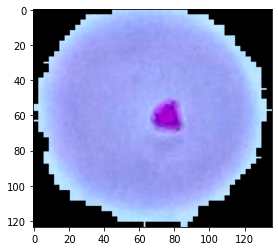

In [22]:
plt.imshow(img_arr)

* Image travaillée padée

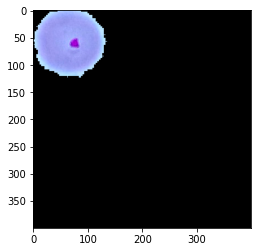

In [23]:
plt.imshow(img_arr_padded)

* Image d'origine

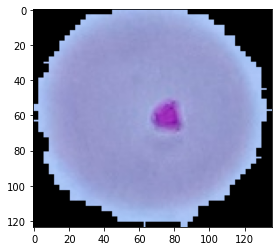

In [24]:
plt.imshow(cv2.imread(path_img))